In [1]:
%matplotlib inline

import os
import sys
sys.path.append('../')
import pickle
import glob

import pingouin as pg
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import expon
from scipy.stats import kstest
from scipy.stats import uniform
import yaml

import jax.config as jax_config

sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../src')

from src.variational_inference import hawkes_temporal_memory_decay_background_variational_inference as VI


from scipy.interpolate import CubicSpline

/home/noashin/.pyenv/versions/3.7.4/envs/hawkes/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/home/noashin/.pyenv/versions/3.7.4/envs/hawkes/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.9, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
plt.rc('font', family='serif')

In [6]:
results_folder = './results/vanc/low_alpha/20220131-130817_vanc_gpu_1/'
input_file = 'data_input.yml'
data_file = 'data.p'
results_file = 'res.p'

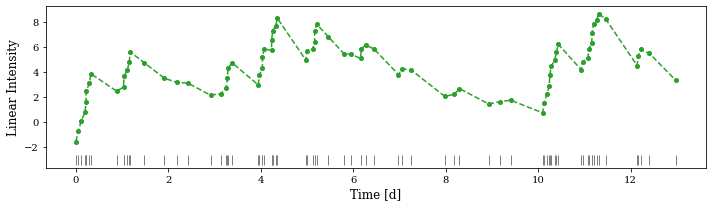

In [33]:
res_input_file = os.path.join(results_folder, input_file)
res_data_file = os.path.join(results_folder, data_file)
res_results_file = os.path.join(results_folder, results_file)

with open(res_data_file, 'rb') as f:
    dat = pickle.load(f)
with open(res_input_file, 'rb') as stream:
    config = yaml.safe_load(stream)        
num_trials = len(dat)
num_events = [len(dat[n]) for n in range(num_trials)]
num_events = [0] + num_events
num_events_cumsum = np.cumsum(np.array(num_events))

num_induced_points = config['num_inducing_points']
num_integration_points = config['num_integration_points']
hypers_array = [0, 0, 0, 0]
T = dat[0][-1] + 0.5

hawkes_vi_obj = VI(T, hypers_array[-1], num_induced_points, alpha_0=4, betta_0=0.06,
         lmbda_star=None, conv_crit=1e-4,
         num_integration_points=num_integration_points,
         noise=1e-4)

with open(res_results_file, 'rb') as f:
    # hawkes_vi_obj.LB_list, hawkes_vi_obj.mu_g_X, hawkes_vi_obj.mu_g2_X, hawkes_vi_obj.hyper_params_list,
    # hawkes_vi_obj.induced_points, hawkes_vi_obj.integration_points, hawkes_vi_obj.Kss_inv, hawkes_vi_obj.ks_int_points,
    # hawkes_vi_obj.ks_X, hawkes_vi_obj.real_events, hawkes_vi_obj.Sigma_g_s, hawkes_vi_obj.mu_g_s, hawkes_vi_obj.lmbda_star_q1, hawkes_vi_obj.alpha_q1,
    # hawkes_vi_obj.beta_q1, hawkes_vi_obj.test_log_like_list, hawkes_vi_obj.mu_g2_int_points, hawkes_vi_obj.mu_g_int_points,
    # hawkes_vi_obj.log_lmbda_star_q1 = pickle.load(f)
    res = pickle.load(f)

lim = 80
for i in range(num_trials):
    plt.figure(figsize=(10, 3))
    # plt.plot(test_grid[0], mean_lmbda_pred[i*len(test_grid[0]):(i+1)*len(test_grid[0])])
    plt.plot(dat[i][:lim], res[1][:lim], '--o', color='C2', markersize=4)
    plt.plot(dat[i][:lim], np.repeat(min(res[1][:lim]) - 1.5, len(dat[i][:lim])), '|', color='C7', markersize=10)
    plt.xlabel('Time [d]')
    plt.ylabel('Linear Intensity')
    #for event in dat[0]:
     #   plt.axvline(x=event, color='r', linewidth=0.4)
    plt.tight_layout()
    plt.savefig(f'vanc_intensities.pdf', format='pdf', dpi=300)
    plt.show()

In [16]:
len(dat[0])

519

In [29]:
hawkes_vi_obj.mu_g2_X

In [17]:
res = pickle.load(f)

ValueError: peek of closed file